# Texas Salary Prediction

This database has salary information for positions at all 113 agencies in the Texas state government. The Tribune obtained this data by requesting salary records from the state comptroller, as allowed by the Texas Public Information Act.

**Problem Statement**

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a predictive model which will help the Texas state government  team to know the payroll information of employees of the state of Texas.  

Task 3:-<br>
●	Who are the outliers in the salaries?<br>
●	What departments/roles have the biggest wage disparities between managers and employees?<br>
●	Have salaries and total compensations for some roles/ departments/ head-count changed over time?<br>



In [1]:
# Loading Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Task 1:-Prepare a complete data analysis report on the given data.

In [2]:
# Loading dataset
data=pd.read_csv('salary.csv')
pd.set_option("display.max_columns",None)

In [3]:
data.head(2)

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True


In [4]:
data1=data.copy()

### Domain Analysis

* Agency:- Department IDs
* Agency Name:- Name of Dapartments where employee worked
* Last Name:- Last Name of Employee
* First Name:- First Name of Employee
* MI (Middle Initial):-Middle Name initial of Employee
* Class title:- Job title / Designation of Employee
* Ethnicity:- origin of Employee from which group he or she belongs
* Gender:- gender of Employee
* Status:- It has type of job like part time, full time, regular, temporary etc.
* Employ Date:- Joining date
* Hourly rate:- Hourly paid amount
* Hrs per week:- Working Hours
* Monthly (Monthly income):- Monthly salary
* Annual (Annual Income):-Annual salary
* State number

**Annual is a output variable and remaining features are input variable**

# Basic Checks

In [5]:
data.shape   ## Number of rows and columns

(149481, 21)

In [6]:
data.info()  #Memory Status

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AGENCY                   149481 non-null  int64  
 1   AGENCY NAME              149481 non-null  object 
 2   LAST NAME                149481 non-null  object 
 3   FIRST NAME               149481 non-null  object 
 4   MI                       149481 non-null  object 
 5   CLASS CODE               149481 non-null  object 
 6   CLASS TITLE              149481 non-null  object 
 7   ETHNICITY                149481 non-null  object 
 8   GENDER                   149481 non-null  object 
 9   STATUS                   149481 non-null  object 
 10  EMPLOY DATE              149481 non-null  object 
 11  HRLY RATE                149481 non-null  float64
 12  HRS PER WK               149481 non-null  float64
 13  MONTHLY                  149481 non-null  float64
 14  ANNU

In [7]:
data.columns

Index(['AGENCY', 'AGENCY NAME', 'LAST NAME', 'FIRST NAME', 'MI', 'CLASS CODE',
       'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY DATE',
       'HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL', 'STATE NUMBER',
       'duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs',
       'summed_annual_salary', 'hide_from_search'],
      dtype='object')

In [8]:
# Statistical Analysis
data.describe().T

,count,mean,std,min,25%,50%,75%,max
AGENCY,149481.0,545.736288,139.057691,101.0,529.00,530.00,696.00,9.300000e+02
HRLY RATE,149481.0,0.346488,4.211485,0.0,0.00,0.00,0.00,1.177885e+02
HRS PER WK,149481.0,39.714918,2.323855,1.0,40.00,40.00,40.00,7.000000e+01
MONTHLY,149481.0,4226.184248,2093.111691,50.0,3019.84,3720.17,4865.81,4.612500e+04
ANNUAL,149481.0,50714.210973,25117.340292,600.0,36238.08,44642.04,58389.72,5.535000e+05
STATE NUMBER,149481.0,565193.023521,478621.220542,1.0,113334.00,346373.00,1100500.00,1.271604e+06
multiple_full_time_jobs,14.0,1.000000,0.000000,1.0,1.00,1.00,1.00,1.000000e+00
summed_annual_salary,16.0,74303.955000,51925.944282,18000.0,32962.50,48063.30,123751.77,1.713834e+05


* Maximum hourly rate is $117.78

* Maximum working hours per week is 70

* Average montly salary is $4226.18<br>

* Average annual salary is $50714.21

In [9]:
data.describe(include='O')

,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,duplicated,combined_multiple_jobs,hide_from_search
count,149481,149481,149481,149481,149481,149481,149481,149481,149481,149481,143,97,16
unique,113,38675,23559,27,1481,1422,6,2,11,6295,1,1,1
top,HEALTH AND HUMAN SERVICES COMMISSION ...,SMITH,MICHAEL,,4504,CORREC OFFICER IV ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/01/17,True,True,True
freq,36667,1243,1843,38408,9267,9267,67142,85328,142502,12359,143,97,16


In [10]:
# Categorical columns
cat_cols=data.select_dtypes(include='O')
cat_cols.columns

Index(['AGENCY NAME', 'LAST NAME', 'FIRST NAME', 'MI', 'CLASS CODE',
       'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY DATE',
       'duplicated', 'combined_multiple_jobs', 'hide_from_search'],
      dtype='object')

In [11]:
# Numerical columns
num_cols=data.select_dtypes(include=['int64','float64'])
num_cols.columns

Index(['AGENCY', 'HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL',
       'STATE NUMBER', 'multiple_full_time_jobs', 'summed_annual_salary'],
      dtype='object')

In [12]:
# Unique values in categorical columns
for i in cat_cols:
    print(i)
    print(data[i].unique())
    print('*****************************************************************************************')

AGENCY NAME
['COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECTION '
 'OFFICE OF COURT ADMINISTRATION                    '
 'TEXAS DEPARTMENT OF CRIMINAL JUSTICE              '
 'OFFICE OF THE ATTORNEY GENERAL                    '
 'TEXAS DEPARTMENT OF TRANSPORTATION                '
 'TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL         '
 'BOARD OF EXAMINERS OF PSYCHOLOGISTS               '
 'DEPARTMENT OF STATE HEALTH SERVICES               '
 'DEPARTMENT OF FAMILY AND PROTECTIVE SERVICES      '
 'HEALTH AND HUMAN SERVICES COMMISSION              '
 'DEPARTMENT OF AGRICULTURE                         '
 'SCHOOL FOR THE BLIND AND VISUALLY IMPAIRED        '
 'SCHOOL FOR THE DEAF                               '
 'SENATE                                            '
 'LEGISLATIVE BUDGET BOARD                          '
 'HOUSE OF REPRESENTATIVES                          '
 'TEXAS FACILITIES COMMISSION                       '
 'STATE PRESERVATION BOARD                          '
 'TEXAS LEGISLAT

In [13]:
# Unique values in numerical columns
for i in num_cols:
    print(i)
    print(data[i].unique())

AGENCY
[241 212 696 302 601 510 520 537 530 529 551 771 772 101 104 102 303 809
 103 105 201 211 213 215 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 242 243 300 301 304 306 307 313 320 323 326 329 332 338 352 360
 401 403 405 407 448 452 454 455 457 458 459 460 464 469 473 479 481 503
 508 513 515 533 542 554 608 644 701 781 802 813 907 930 116 305 308 312
 327 347 356 359 362 364 409 411 450 451 456 466 475 476 477 504 507 514
 578 580 582 592 808]
HRLY RATE
[ 75.9615   81.04454  81.04453   0.       49.40717  28.58     25.
  17.33     13.13     11.5      20.00002  14.82693  30.16251  16.01272
  19.       67.30765  75.96     30.       16.17     13.5      52.
  30.87     82.635    30.1      17.00001  28.88     16.33     66.37
  17.00002  19.23     17.       33.66     46.7      28.85     15.10003
  44.5673   17.45717  15.75     14.       56.44     55.49     25.86
  27.9777   11.32413 117.78848  79.95813  34.25723  28.08311  11.43317
  24.9998   11.32412  37.95808  85.16291  

# Data Cleaning

In [14]:
#Rename the values having space in the columns

In [15]:
data['ETHNICITY']=data['ETHNICITY'].str.strip()

In [16]:
data['ETHNICITY'].unique()

array(['WHITE', 'HISPANIC', 'BLACK', 'OTHER', 'AM INDIAN', 'ASIAN'],
      dtype=object)

In [17]:
## Removing space
data['GENDER']=data['GENDER'].str.strip()

In [18]:
data['ETHNICITY']=data['ETHNICITY'].str.strip()

In [19]:
data.isna().sum() # checking for missing values

AGENCY                          0
AGENCY NAME                     0
LAST NAME                       0
FIRST NAME                      0
MI                              0
CLASS CODE                      0
CLASS TITLE                     0
ETHNICITY                       0
GENDER                          0
STATUS                          0
EMPLOY DATE                     0
HRLY RATE                       0
HRS PER WK                      0
MONTHLY                         0
ANNUAL                          0
STATE NUMBER                    0
duplicated                 149338
multiple_full_time_jobs    149467
combined_multiple_jobs     149384
summed_annual_salary       149465
hide_from_search           149465
dtype: int64

In [20]:
data.isna().sum()[data.isna().sum()>0]  ## Columns with missing values

duplicated                 149338
multiple_full_time_jobs    149467
combined_multiple_jobs     149384
summed_annual_salary       149465
hide_from_search           149465
dtype: int64

In [21]:
data.isna().sum()[data.isna().sum()>0]*100/data.shape[0]  ## Percentage of missing values

duplicated                 99.904336
multiple_full_time_jobs    99.990634
combined_multiple_jobs     99.935109
summed_annual_salary       99.989296
hide_from_search           99.989296
dtype: float64

In [22]:
# Dropping columns having more than 99% missing data
data.drop(['duplicated','multiple_full_time_jobs','combined_multiple_jobs','summed_annual_salary','hide_from_search'],axis=1,inplace=True)

In [23]:
#Renaming columns
data.rename(columns={'AGENCY NAME':'AGENCY_NAME','LAST NAME':'LAST_NAME','FIRST NAME':'FIRST_NAME','CLASS CODE':'CLASS_CODE','CLASS TITLE':'CLASS_TITLE','EMPLOY DATE':'EMPLOY_DATE','HRLY RATE':'HRLY_RATE','HRS PER WK':'HRS_PER_WK','STATE NUMBER':'STATE_NUMBER'},inplace=True)

In [24]:
data.head(1)

,AGENCY,AGENCY_NAME,LAST_NAME,FIRST_NAME,MI,CLASS_CODE,CLASS_TITLE,ETHNICITY,GENDER,STATUS,EMPLOY_DATE,HRLY_RATE,HRS_PER_WK,MONTHLY,ANNUAL,STATE_NUMBER
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.9615,29.0,9545.82,114549.84,127717


# Exploratory Data Analysis

## UNIVARIATE ANALYSIS

### Distplot<br>
* Represents the distribution of numerical columns

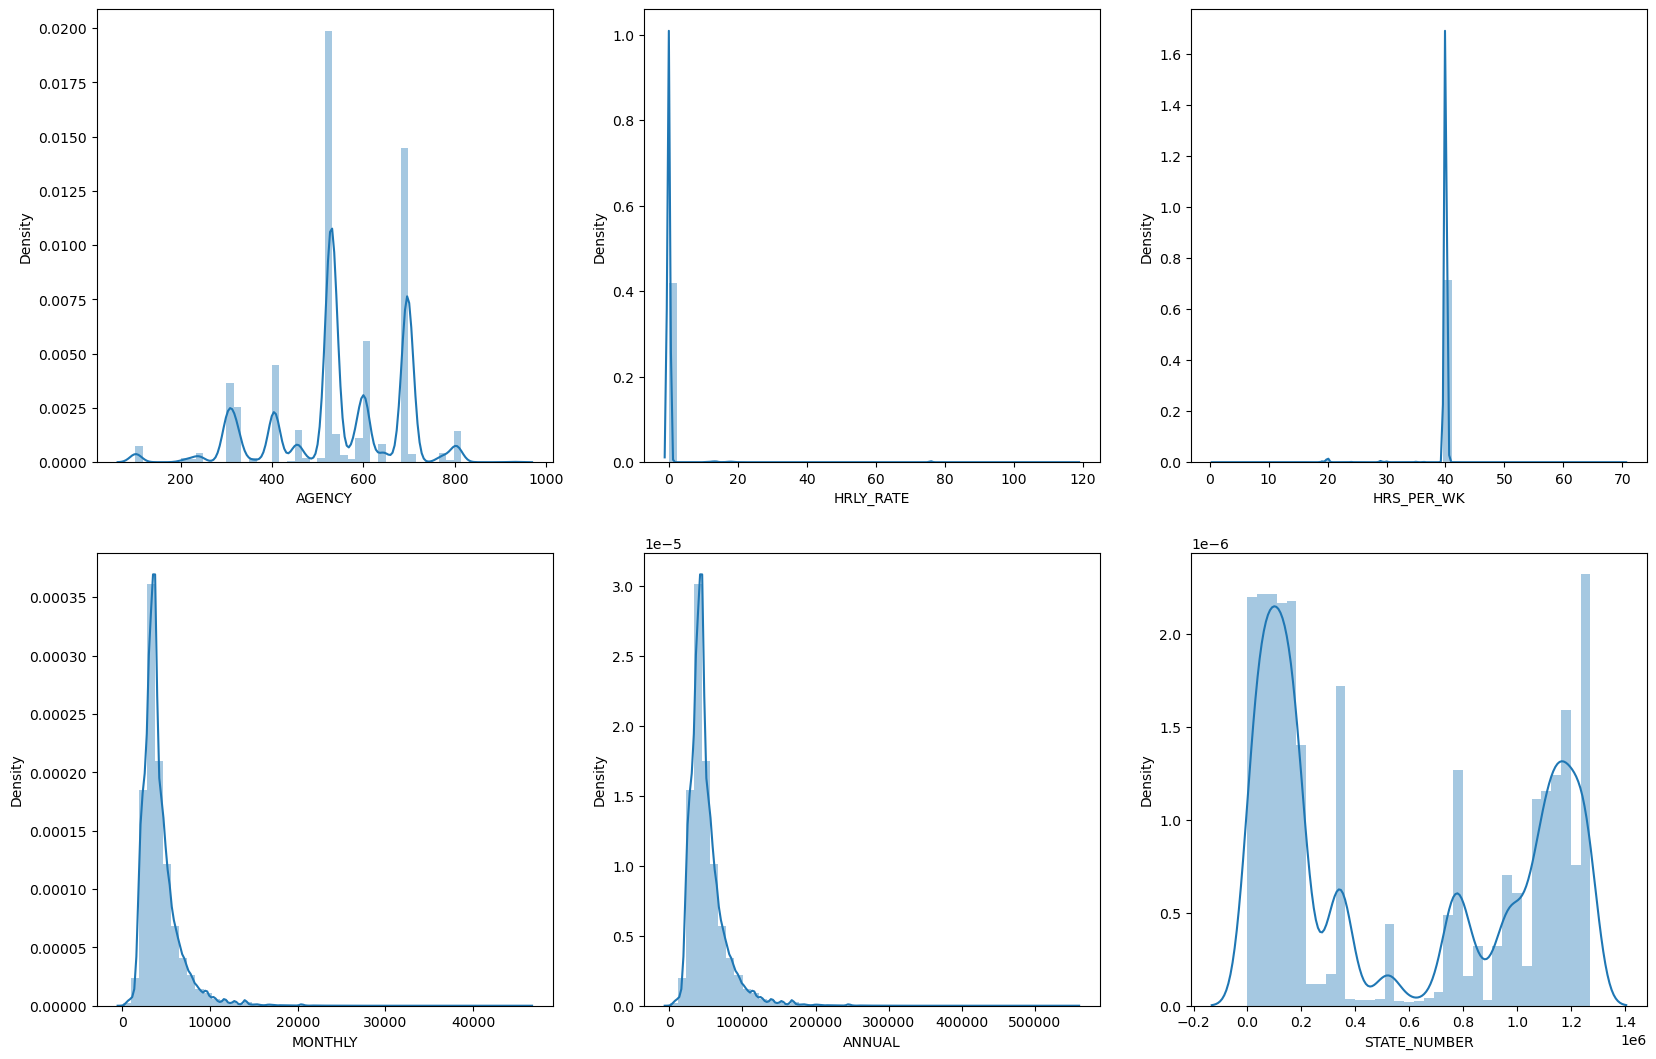

In [25]:
# Numerical Data Analysis
num_col=data.select_dtypes(include=['int64','float64'])
plt.figure(figsize=(20,20))
num=1
for col in num_col:
    if num<=6:
        plt.subplot(3,3,num)
        sns.distplot(x=data[col])
        plt.xlabel(col)
    num+=1

### Insights
* Hrly rate has corrupted data because distribution is saturated to 0
* almost all employees works 40hrs per week
* almost all monthly salaries lies between range 0 and 20000, it is skewed distribution (Not Normally Distributed)
* almost all annual salaries lies between range 0 and 20000, it is skewed distribution (Not Normally Distributed)

### COUNT PLOT<br>
* Gives the count of observations

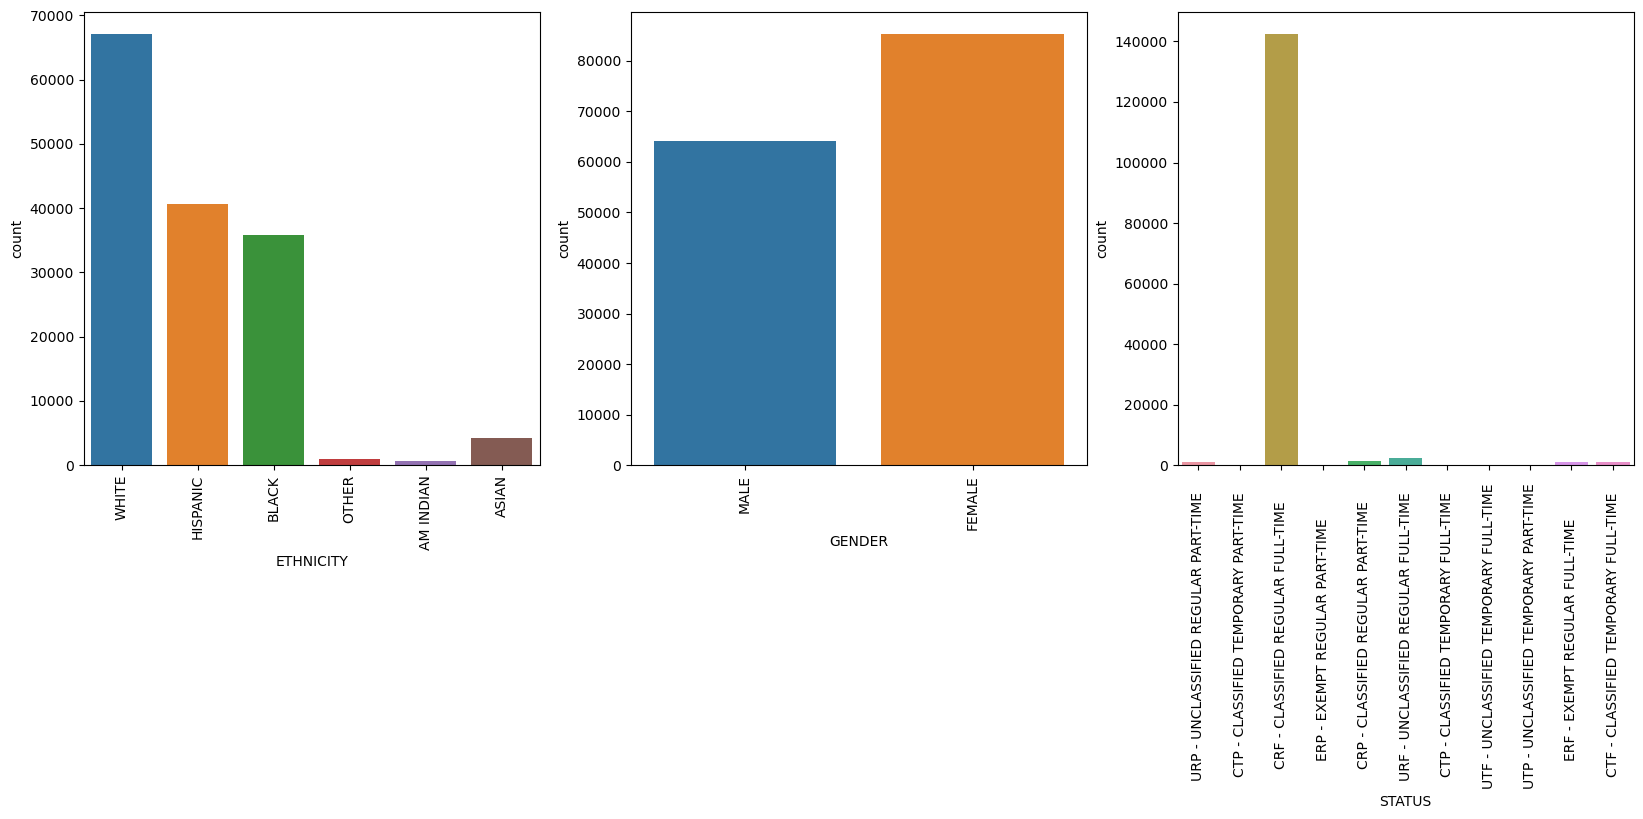

In [26]:
# Categorical Data Analysis
cat_col=data[['ETHNICITY','GENDER','STATUS']]
plt.figure(figsize=(20,20))
num=1
for col in cat_col:
    if num<=3:
        plt.subplot(3,3,num)
        sns.countplot(x=data[col])
        plt.xlabel(col)
        plt.xticks(rotation = 90)
    num+=1

## Insights
* Number Female employees are more than Male employees
* Most of employees has job type(status) CRF - CLASSIFIED REGULAR FULL-TIME.

## BIVARIATE ANALYSIS

### SCATTER PLOT<br>
* Checking for correlation

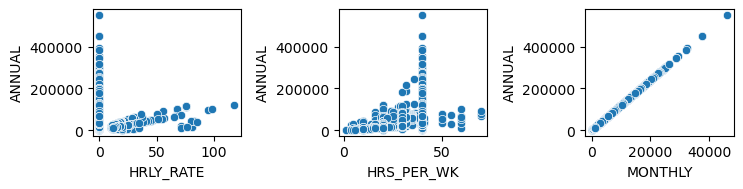

In [27]:
corr_cols=['HRLY_RATE',"HRS_PER_WK",'MONTHLY']
plt.figure(figsize=(10,2))
plot_num=1
for x in corr_cols:
    if plot_num<=4:
        plt.subplot(1,4,plot_num)
        sns.scatterplot(x=data[x],y=data['ANNUAL'])
        plt.xlabel(x)
    plot_num+=1
plt.tight_layout()

## Insights
* Hrs per week doesn't show any correlation with ANNUAL Income.
* Monthly column has direct correlation with ANNUAL Income.
* Most of the values from HRLY RATE are 0, ramining show correlation with target.

<Axes: xlabel='GENDER', ylabel='ANNUAL'>

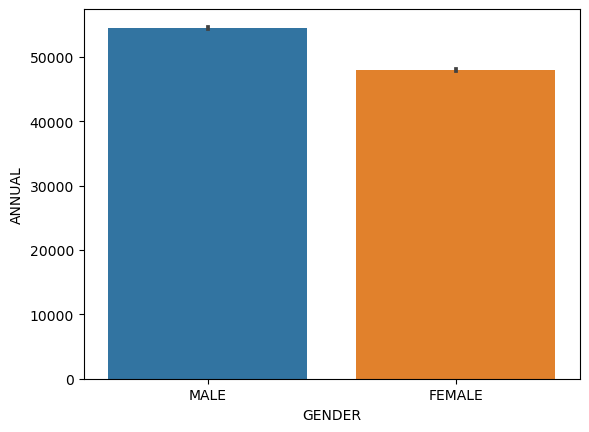

In [28]:
sns.barplot(x=data['GENDER'],y=data["ANNUAL"])

<Axes: xlabel='ETHNICITY', ylabel='ANNUAL'>

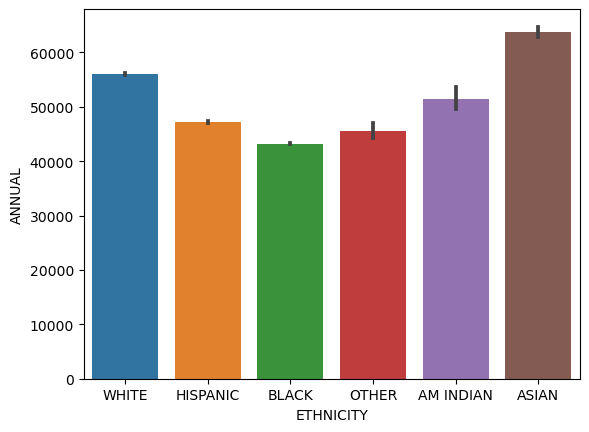

In [29]:
sns.barplot(x=data['ETHNICITY'],y=data["ANNUAL"])

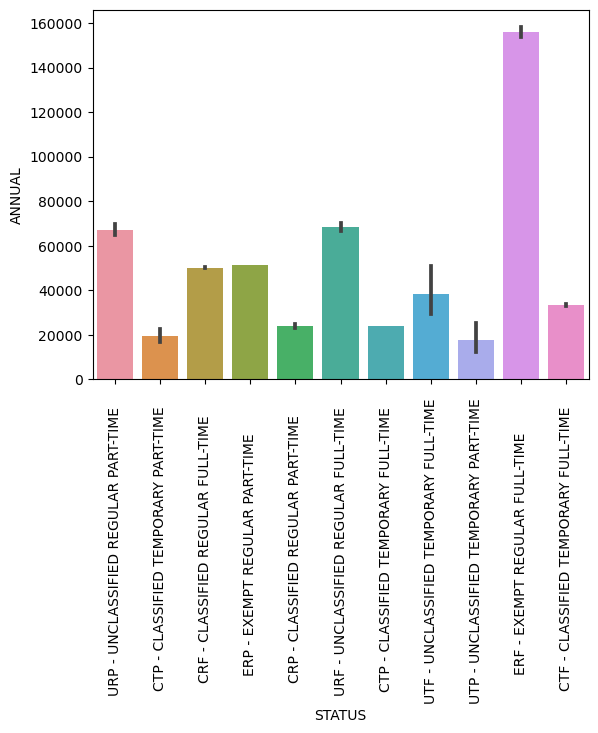

In [30]:
sns.barplot(x=data['STATUS'],y=data["ANNUAL"])
x=plt.xticks(rotation=90)

* Male employees are receiving more annual salary
* ASIAN and White is sharing high salary
* Exempt regular full time employees has more annual salary

# Multivariate Analysis

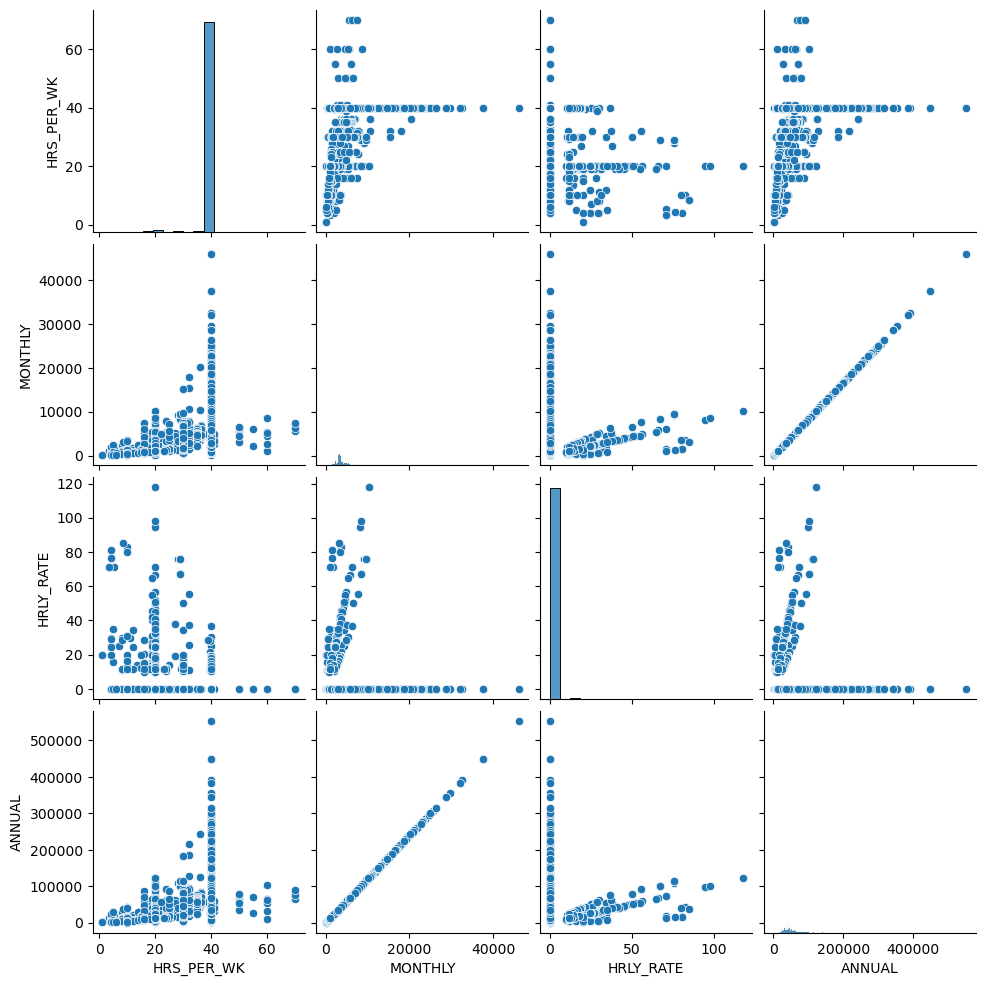

In [31]:
num_col=data[['HRS_PER_WK','MONTHLY','HRLY_RATE','ANNUAL']]
sns.pairplot(data=num_col)

<Axes: >

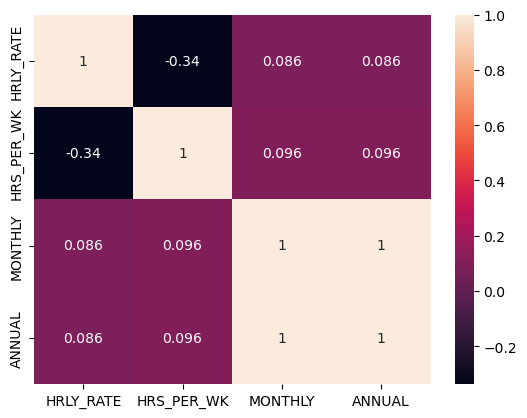

In [32]:

sns.heatmap(data[['HRLY_RATE',"HRS_PER_WK",'MONTHLY','ANNUAL']].corr(),annot=True)

# PREPROCESSING

In [33]:
#### Checking Duplicate Values
data.duplicated().sum()

0

<Axes: xlabel='HRLY_RATE', ylabel='Count'>

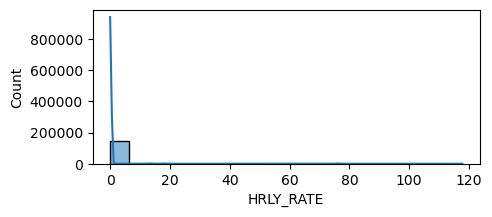

In [34]:
plt.figure(figsize=(5,2))
sns.histplot(x=data['HRLY_RATE'],kde=True)

* Most values in hourly rate column is zero and hence data is corrupted

In [35]:
data.drop(['HRLY_RATE'],axis=1,inplace=True)

# OUTLIERS IN THE SALARIES

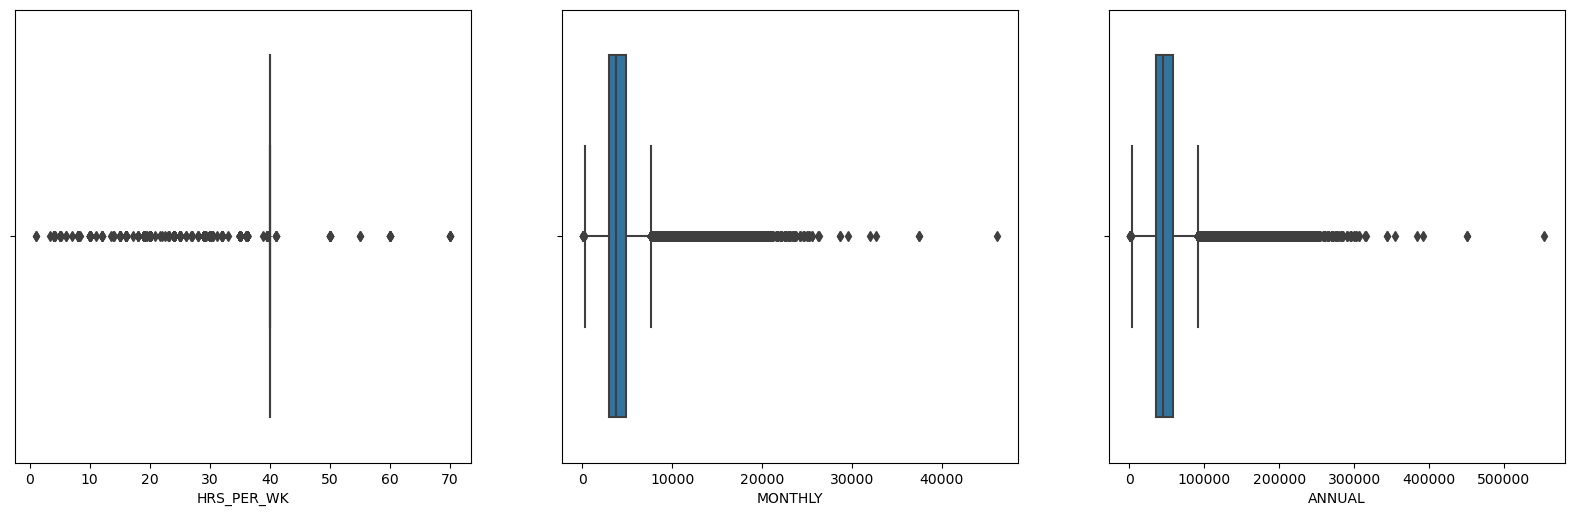

In [36]:
num_col=data[['HRS_PER_WK','MONTHLY','ANNUAL']]
plt.figure(figsize=(20,20))
num=1
for col in num_col:
    if num<=4:
        plt.subplot(3,3,num)
        sns.boxplot(x=data[col])
        plt.xlabel(col)

    num+=1

In [37]:
num_col=data[['HRS_PER_WK','MONTHLY','ANNUAL']]
for col in num_col:
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    print("***********")
    print("Column Name:",col)
    print("IQR  ",IQR)
    print("Lower  ",lower)
    print("Upper  ",upper)
    print("Outliers Percentage",len(data.loc[(data[col]<lower)|(data[col]>upper)])/len(data))
    print("***********")

***********
Column Name: HRS_PER_WK
IQR   0.0
Lower   40.0
Upper   40.0
Outliers Percentage 0.017453723215659515
***********
***********
Column Name: MONTHLY
IQR   1845.9700000000003
Lower   250.88499999999976
Upper   7634.765000000001
Outliers Percentage 0.060415705005987384
***********
***********
Column Name: ANNUAL
IQR   22151.64
Lower   3010.6200000000026
Upper   91617.18
Outliers Percentage 0.060415705005987384
***********


In [38]:
# Handling outliers forcolumn having less than 5% missing values
data.loc[(data['HRS_PER_WK']<lower)|(data['HRS_PER_WK']>upper),'HRS_PER_WK']=data['HRS_PER_WK'].median()

## ENCODING

In [39]:
cat_col=data.select_dtypes(include=['object'])
cat_col.columns

Index(['AGENCY_NAME', 'LAST_NAME', 'FIRST_NAME', 'MI', 'CLASS_CODE',
       'CLASS_TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY_DATE'],
      dtype='object')

In [40]:
data['GENDER']=data['GENDER'].replace({'FEMALE':0,'MALE':1})


In [41]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
data['STATUS']=lb.fit_transform(data['STATUS'])
data['ETHNICITY']=lb.fit_transform(data['ETHNICITY'])

In [42]:
data.head(2)

,AGENCY,AGENCY_NAME,LAST_NAME,FIRST_NAME,MI,CLASS_CODE,CLASS_TITLE,ETHNICITY,GENDER,STATUS,EMPLOY_DATE,HRS_PER_WK,MONTHLY,ANNUAL,STATE_NUMBER
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",5,1,8,02/18/88,40.0,9545.82,114549.84,127717
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,5,1,4,02/01/15,40.0,1404.77,16857.24,127717


# FEATURE ENGINEERING

### Handling Employee date column

In [43]:
data['EMPLOY_DATE']=pd.to_datetime(data['EMPLOY_DATE'])
data['EMPLOY_DT']=data['EMPLOY_DATE'].dt.day
data['EMPLOY_Month']=data['EMPLOY_DATE'].dt.month
data['EMPLOY_YR']=data['EMPLOY_DATE'].dt.year

In [44]:
data.head(3)

,AGENCY,AGENCY_NAME,LAST_NAME,FIRST_NAME,MI,CLASS_CODE,CLASS_TITLE,ETHNICITY,GENDER,STATUS,EMPLOY_DATE,HRS_PER_WK,MONTHLY,ANNUAL,STATE_NUMBER,EMPLOY_DT,EMPLOY_Month,EMPLOY_YR
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",5,1,8,1988-02-18,40.0,9545.82,114549.84,127717,18,2,1988
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,5,1,4,2015-02-01,40.0,1404.77,16857.24,127717,1,2,2015
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",5,1,8,2020-02-01,40.0,9545.82,114549.84,59115,1,2,2020


In [45]:
#calculating years of experiance based on joining date
from datetime import datetime
data['EMPLOY_DATE'] = pd.to_datetime(data['EMPLOY_DATE'])
current_date = datetime.now()  # Get current date and time
data['YRS_EXP']=(current_date -data['EMPLOY_DATE'] ).dt.days/365.25

In [46]:
data.head(3)

,AGENCY,AGENCY_NAME,LAST_NAME,FIRST_NAME,MI,CLASS_CODE,CLASS_TITLE,ETHNICITY,GENDER,STATUS,EMPLOY_DATE,HRS_PER_WK,MONTHLY,ANNUAL,STATE_NUMBER,EMPLOY_DT,EMPLOY_Month,EMPLOY_YR,YRS_EXP
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",5,1,8,1988-02-18,40.0,9545.82,114549.84,127717,18,2,1988,36.303901
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,5,1,4,2015-02-01,40.0,1404.77,16857.24,127717,1,2,2015,9.349760
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",5,1,8,2020-02-01,40.0,9545.82,114549.84,59115,1,2,2020,4.350445


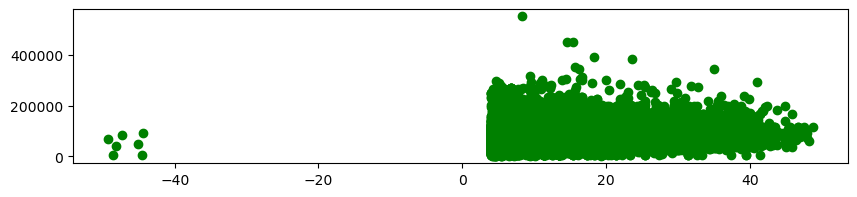

In [47]:
plt.figure(figsize=(10,2))
plt.scatter(x=data['YRS_EXP'],y=data['ANNUAL'],color = "green")

In [48]:
data.loc[data['YRS_EXP']<0]

,AGENCY,AGENCY_NAME,LAST_NAME,FIRST_NAME,MI,CLASS_CODE,CLASS_TITLE,ETHNICITY,GENDER,STATUS,EMPLOY_DATE,HRS_PER_WK,MONTHLY,ANNUAL,STATE_NUMBER,EMPLOY_DT,EMPLOY_Month,EMPLOY_YR,YRS_EXP
20904,405,DEPARTMENT OF PUBLIC SAFETY ...,HARALSON,JOE,W,9940,"SERGEANT, DPS ...",5,1,0,2071-10-06,40.0,7207.91,86494.92,171968,6,10,2071,-47.326489
88771,601,TEXAS DEPARTMENT OF TRANSPORTATION ...,HALFORD,JULIA,F,0152,ADMINISTRATIVE ASST II ...,5,0,0,2072-08-01,40.0,3388.44,40661.28,100209,1,8,2072,-48.147844
92736,601,TEXAS DEPARTMENT OF TRANSPORTATION ...,OTAHAL,MARY,M,1572,PROGRAM SPECIALIST III ...,5,0,0,2073-09-10,40.0,5733.00,68796.00,180353,10,9,2073,-49.256674
116978,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,JUDD,ARTHUR,G,4675,AGRICULTURE SPEC V ...,5,1,0,2069-07-14,40.0,4033.74,48404.88,68427,14,7,2069,-45.097878
141891,102,HOUSE OF REPRESENTATIVES ...,CRADDICK,TOM,R,7109,ELECTED OFFICIAL ...,5,1,7,2069-01-14,40.0,600.00,7200.00,116511,14,1,2069,-44.602327
142425,102,HOUSE OF REPRESENTATIVES ...,THOMPSON,SENFRONIA,,7109,ELECTED OFFICIAL ...,2,0,7,2073-01-09,40.0,600.00,7200.00,6963,9,1,2073,-48.588638
148921,592,SOIL AND WATER CONSERVATION BOARD ...,BRANDENBERGER,DONALD,C,1576,PROGRAM SPECIALIST VII ...,5,1,0,2068-12-01,40.0,7658.41,91900.92,96871,1,12,2068,-44.481862


In [49]:
# dropping irrelevant records
data.drop([20904,88771,116978,141891,148921],axis=0,inplace=True)

<Axes: xlabel='EMPLOY_YR', ylabel='ANNUAL'>

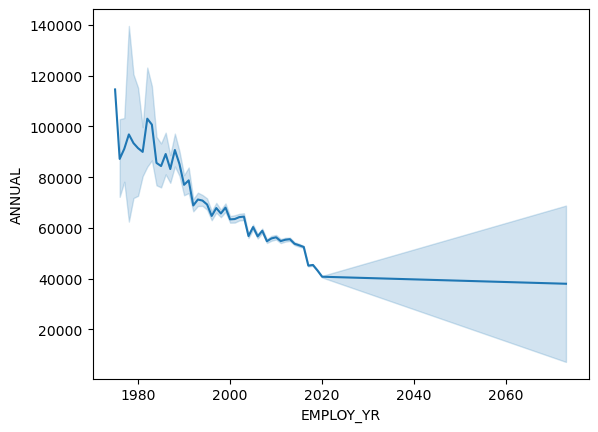

In [50]:
sns.lineplot(data=data,x='EMPLOY_YR',y='ANNUAL')

### Dropping unwanted columns

In [51]:
data.head(1)

,AGENCY,AGENCY_NAME,LAST_NAME,FIRST_NAME,MI,CLASS_CODE,CLASS_TITLE,ETHNICITY,GENDER,STATUS,EMPLOY_DATE,HRS_PER_WK,MONTHLY,ANNUAL,STATE_NUMBER,EMPLOY_DT,EMPLOY_Month,EMPLOY_YR,YRS_EXP
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",5,1,8,1988-02-18,40.0,9545.82,114549.84,127717,18,2,1988,36.303901


In [52]:
data.drop(['AGENCY','AGENCY_NAME','LAST_NAME','FIRST_NAME','MI','CLASS_CODE','CLASS_TITLE','EMPLOY_DATE','STATE_NUMBER'],axis=1,inplace=True)

In [53]:
data.head(2)

,ETHNICITY,GENDER,STATUS,HRS_PER_WK,MONTHLY,ANNUAL,EMPLOY_DT,EMPLOY_Month,EMPLOY_YR,YRS_EXP
0,5,1,8,40.0,9545.82,114549.84,18,2,1988,36.303901
1,5,1,4,40.0,1404.77,16857.24,1,2,2015,9.349760


# SPLITING DATA

In [54]:
x=data.drop(['ANNUAL'],axis=1)
y=data['ANNUAL']


# SCALING OF DATA

In [55]:
from sklearn.preprocessing  import MinMaxScaler
scaler = MinMaxScaler()

In [56]:
x[['HRS_PER_WK','MONTHLY','YRS_EXP']]= scaler.fit_transform(x[['HRS_PER_WK','MONTHLY','YRS_EXP']])

In [57]:
y_trans=np.log(y)
y_trans.head()

0    11.648765
1     9.732536
2    11.648765
3     9.732536
4    10.581806
Name: ANNUAL, dtype: float64

# Task:2 Create a predictive model which will help theTexas state government  team to know the payroll information of employees of the state of Texas.  

# MODEL BUILDING

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y_trans, test_size=0.2, random_state=42)

# LINEAR REGRESSION

In [60]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [61]:
y_pred=model.predict(x_test)
y_pred

array([11.11391668, 10.73483894, 10.79817397, ..., 11.00727989,
       10.90868022, 10.63194227])

In [62]:
model.coef_

array([ 4.34018183e-03,  1.09793424e-02, -3.40421393e-02,  4.63518113e-13,
        8.51757763e+00,  3.73154810e-03,  8.27263023e-02,  9.92643648e-01,
        9.76969524e+01])

In [63]:
model.intercept_

-2048.8157922656915

In [64]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))


MAE 0.0933775145497618
MSE 0.0226707188106984


In [65]:
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

0.1505679873369449

In [66]:
r2score_lr=r2_score(y_test,y_pred)
print('r2 score LR',r2score_lr)

r2 score LR 0.8704669052782479


# KNN REGRESSOR

In [67]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)


KNeighborsRegressor()

In [68]:
ypred_knn = knn.predict(x_test)


In [69]:
MSE=mean_squared_error(y_test,ypred_knn)
print('MSE is ',MSE)
MAE=mean_absolute_error(y_test,ypred_knn)
print('MAE is',MAE)
RMSE=np.sqrt(MSE)
print('RMSE is ',RMSE)


MSE is  0.04530485912244029
MAE is 0.10561283226397374
RMSE is  0.2128493813062192


In [70]:
r_squaredknn=r2_score(y_test,ypred_knn)
print('r2_score is',r_squaredknn)

r2_score is 0.7411428081718636


# DECISION TREE REGRESSOR

In [71]:
from sklearn.tree import DecisionTreeRegressor
dec = DecisionTreeRegressor()
dec.fit(x_train, y_train)
ypred_dec = dec.predict(x_test)


In [72]:

MSE=mean_squared_error(y_test,ypred_dec)
print('MSE is ',MSE)
MAE=mean_absolute_error(y_test,ypred_dec)
print('MAE is',MAE)
RMSE=np.sqrt(MSE)
print('RMSE is ',RMSE)


MSE is  2.1981288959898925e-05
MAE is 7.551150011939056e-05
RMSE is  0.0046884207319628345


In [73]:
r_squareddt=r2_score(y_test,ypred_dec)
print('r2_score is',r_squareddt)

r2_score is 0.9998744060826336


# XGB REGRESSOR

In [74]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_train, y_train)
ypred_xgb = xgb.predict(x_test)

In [75]:
MSE=mean_squared_error(y_test,ypred_xgb)
print('MSE is ',MSE)
MAE=mean_absolute_error(y_test,ypred_xgb)
print('MAE is',MAE)
RMSE=np.sqrt(MSE)
print('RMSE is ',RMSE)
r_squaredxgb=r2_score(y_test,ypred_xgb)
print('r_squared is',r_squaredxgb)

MSE is  0.0009796020981631944
MAE is 0.0037726195371575208
RMSE is  0.03129859578580474
r_squared is 0.9944028730438349


# RANDOM FOREST REGRESSOR

In [76]:
from sklearn.ensemble import RandomForestRegressor
rf =  RandomForestRegressor()
rf.fit(x_train, y_train)
ypred_rf = rf.predict(x_test)

In [77]:
MSE=mean_squared_error(y_test,ypred_rf)
print('MSE is ',MSE)
MAE=mean_absolute_error(y_test,ypred_rf)
print('MAE is',MAE)
RMSE=np.sqrt(MSE)
print('RMSE is ',RMSE)
r_squaredrf=r2_score(y_test,ypred_rf)
print('r_squared is',r_squaredrf)

MSE is  2.4271386547130217e-05
MAE is 7.299990013836392e-05
RMSE is  0.0049265998972039746
r_squared is 0.9998613212117847


# GRADIENT BOOSTING REGRESSOR

In [78]:
from sklearn.ensemble import  GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)
ypred_gb = gb.predict(x_test)

In [79]:
MSE=mean_squared_error(y_test,ypred_gb)
print('MSE is ',MSE)
MAE=mean_absolute_error(y_test,ypred_gb)
print('MAE is',MAE)
RMSE=np.sqrt(MSE)
print('RMSE is ',RMSE)
r_squaredgbr=r2_score(y_test,ypred_gb)
print('r_squared is',r_squaredgbr)

MSE is  2.8344427260179553e-05
MAE is 0.002450891403147728
RMSE is  0.005323948465206961
r_squared is 0.9998380491853044


# Task 3.2:- What departments/roles have the biggest wage disparities between managers and employees?

In [80]:
df=data1.loc[data1['CLASS TITLE'].str.contains('MANAGER') | data1['CLASS TITLE'].str.contains('MGR'),['AGENCY NAME','CLASS TITLE','ANNUAL']]
pd.set_option("display.max_colwidth", None)
print('Maximum Salary for Manager: ',df.max().ANNUAL)
print('Minimum Salary for Manager: ',df.min().ANNUAL)
df.describe()

Maximum Salary for Manager:  295640.4
Minimum Salary for Manager:  14624.76


,ANNUAL
count,6577.000000
mean,69398.799520
std,28242.077466
min,14624.760000
25%,44642.040000
50%,68844.000000
75%,84999.960000
max,295640.400000


In [81]:
print('Department/roles have biggest wage:')
df[df['ANNUAL']==df.max().ANNUAL]

Department/roles have biggest wage:


,AGENCY NAME,CLASS TITLE,ANNUAL
136754,TEXAS EDUCATION AGENCY,PORTFOLIO MANAGER VI,295640.4


In [82]:
print('Department/roles have lowest wage:')
df[df['ANNUAL']==df.min().ANNUAL]

Department/roles have lowest wage:


,AGENCY NAME,CLASS TITLE,ANNUAL
22342,DEPARTMENT OF PUBLIC SAFETY,CUSTODIAL MGR I,14624.76


In [83]:
df1=data1.loc[~data1['CLASS TITLE'].str.contains('MANAGER') & ~data1['CLASS TITLE'].str.contains('MGR'),['AGENCY NAME','CLASS TITLE','ANNUAL']]
pd.set_option("display.max_colwidth", None)
#df5.head()
print('Max Salary for Employee',df1.max().ANNUAL)
print('Min Salary for Employee',df1.min().ANNUAL)
df1.describe()

Max Salary for Employee 553500.0
Min Salary for Employee 600.0


,ANNUAL
count,142904.000000
mean,49854.273261
std,24625.299217
min,600.000000
25%,36238.080000
50%,44642.040000
75%,56987.400000
max,553500.000000


In [84]:
print('Department/roles have lowest wage:')
df1[df1['ANNUAL']==df1.max().ANNUAL]

Department/roles have lowest wage:


,AGENCY NAME,CLASS TITLE,ANNUAL
83851,CANCER PREVENTION AND RESEARCH INSTITUTE OF TEXAS,CHIEF SCIENTIFIC OFFICER,553500.0


In [85]:
print('Department/roles have biggest wage:')
df1[df1['ANNUAL']==df1.min().ANNUAL]

Department/roles have biggest wage:


,AGENCY NAME,CLASS TITLE,ANNUAL
142067,HOUSE OF REPRESENTATIVES,ELECTED OFFICIALS STAFF,600.0


# Difference Calculation

In [86]:
data1.loc[data1['CLASS TITLE'].str.contains('MANAGER') | data1['CLASS TITLE'].str.contains('MGR'),'CLASS TITLE']='MANAGER'

In [87]:
data1.loc[~data1['CLASS TITLE'].str.contains('MANAGER') & ~data1['CLASS TITLE'].str.contains('MGR'),'CLASS TITLE']='EMPLOYEE'

In [88]:
data_df1=data1.loc[:,['AGENCY NAME','CLASS TITLE','ANNUAL']]
data_df1.head()

,AGENCY NAME,CLASS TITLE,ANNUAL
0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECTION",EMPLOYEE,114549.84
1,OFFICE OF COURT ADMINISTRATION,EMPLOYEE,16857.24
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECTION",EMPLOYEE,114549.84
3,OFFICE OF COURT ADMINISTRATION,EMPLOYEE,16857.24
4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE,EMPLOYEE,39411.24


# Top departments which has biggest disparity between manager and employee salaries

In [89]:
# Create the pivot table
table = pd.pivot_table(data1, values='ANNUAL', index=['AGENCY NAME'], columns=['CLASS TITLE'], aggfunc=np.mean)

# Calculate the difference between 'manage' and 'employee' annual values
table['Difference'] = table['MANAGER'] - table['EMPLOYEE']


# Sort the pivot table by the 'Difference' column in descending order
sorted_table = table.sort_values(by='Difference', ascending=False)

# Drop the 'Difference' column if you don't need it anymore
sorted_table = sorted_table.drop(columns='Difference')

sorted_table.head()

CLASS TITLE,EMPLOYEE,MANAGER
AGENCY NAME,,
CANCER PREVENTION AND RESEARCH INSTITUTE OF TEXAS,114150.071250,214999.920000
TEACHER RETIREMENT SYSTEM,89952.002446,165494.782500
EMPLOYEES RETIREMENT SYSTEM,81715.002152,149489.171538
BOARD OF NURSE EXAMINERS,63194.071927,117027.240000
STATE AUDITOR'S OFFICE,79551.937143,126022.200000


# Task 3.3:- Have salaries and total compensations for some roles/ departments/ head-count changed over time


In [90]:

top_agencies=data1['AGENCY NAME'].value_counts().nlargest(10)
top_agencies.index.to_list()



['HEALTH AND HUMAN SERVICES COMMISSION              ',
 'TEXAS DEPARTMENT OF CRIMINAL JUSTICE              ',
 'TEXAS DEPARTMENT OF TRANSPORTATION                ',
 'DEPARTMENT OF FAMILY AND PROTECTIVE SERVICES      ',
 'DEPARTMENT OF PUBLIC SAFETY                       ',
 'TEXAS WORKFORCE COMMISSION                        ',
 'OFFICE OF THE ATTORNEY GENERAL                    ',
 'DEPARTMENT OF STATE HEALTH SERVICES               ',
 'PARKS AND WILDLIFE DEPARTMENT                     ',
 'COMPTROLLER OF PUBLIC ACCOUNTS                    ']

In [91]:
new_data=data1.loc[data1['AGENCY NAME'].isin(top_agencies.index.to_list()),['AGENCY NAME','CLASS TITLE','EMPLOY DATE','ANNUAL']]
# Convert "Employ Date" to datetime format
new_data['EMPLOY DATE'] = pd.to_datetime(new_data['EMPLOY DATE'])
new_data['YEAR']=new_data['EMPLOY DATE'].dt.year

# Calculate the head count for each agency
agency_head_count = new_data.groupby('AGENCY NAME').size()

# Add the head count as a new column in the DataFrame
new_data['Head_Count'] = new_data['AGENCY NAME'].map(agency_head_count)

# Sort the DataFrame by the head count column in descending order
sorted_data = new_data.sort_values(by='Head_Count', ascending=False)
sorted_data.head()

,AGENCY NAME,CLASS TITLE,EMPLOY DATE,ANNUAL,YEAR,Head_Count
52621,HEALTH AND HUMAN SERVICES COMMISSION,EMPLOYEE,2019-05-06,23781.00,2019,36667
43732,HEALTH AND HUMAN SERVICES COMMISSION,EMPLOYEE,2004-09-01,39706.32,2004,36667
43734,HEALTH AND HUMAN SERVICES COMMISSION,EMPLOYEE,2013-11-04,32692.80,2013,36667
43735,HEALTH AND HUMAN SERVICES COMMISSION,EMPLOYEE,2017-09-01,25532.64,2017,36667
43736,HEALTH AND HUMAN SERVICES COMMISSION,EMPLOYEE,2019-10-07,29520.96,2019,36667


In [92]:
# Create the pivot table
table = pd.pivot_table(sorted_data, values='ANNUAL', index=['AGENCY NAME', 'Head_Count'], columns=['YEAR'], aggfunc=np.mean)
# Sort the pivot table by the 'Difference' column in descending order
sorted_table = table.sort_index(level='Head_Count', ascending=False)
# Fill NaN values with 0 using applymap
sorted_table_filled = sorted_table.applymap(lambda x: x if pd.notna(x) else 0)
# Reset the index to remove 'Head_Count' from the index levels
sorted_table_filled = sorted_table_filled.reset_index(level='Head_Count')
# Remove the 'Head_Count' column
sorted_table_filled = sorted_table_filled.drop(columns='Head_Count')

sorted_table_filled.head()

YEAR,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2069,2071,2072,2073
AGENCY NAME,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
HEALTH AND HUMAN SERVICES COMMISSION,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36509.760000,110735.400000,0.000000,0.000000,72623.640000,70799.840000,92784.480000,116475.060000,93229.645714,84741.770769,62181.674595,49640.092397,54656.938605,46229.085802,48325.841739,43375.715441,43313.740984,45088.606082,42490.485141,44074.996456,45849.059494,48616.736262,48731.435016,53667.489638,41771.931249,40004.603892,36707.124052,35422.958529,0.00,0.00,0.00,0.0
TEXAS DEPARTMENT OF CRIMINAL JUSTICE,0.0,0.00,0.00,199366.56,64842.42,43835.76,45873.36,0.00,58386.750000,54514.980000,112723.680000,57023.946667,81919.320000,63252.960000,59279.276364,60622.155429,53914.313684,49414.343111,50364.121101,47919.558165,46906.211946,46319.502574,47343.735619,46523.519326,45205.900146,45300.761053,45480.139022,45698.422212,46214.777200,45203.525150,45437.395642,44957.230882,44678.290979,44538.649550,45452.847677,44408.727308,44391.288800,43182.178619,42484.249029,41448.026196,40881.028964,40190.648500,37858.176204,36440.585280,36255.441267,48404.88,0.00,0.00,0.0
TEXAS DEPARTMENT OF TRANSPORTATION,0.0,90300.36,84478.92,83987.76,48431.88,74044.64,126103.41,127674.56,88273.832727,83221.232727,85253.425263,77291.341224,96663.682759,78957.952131,71329.901333,92568.347368,81016.456709,70872.799266,72993.715528,77608.071818,69681.286545,73101.089032,68089.206667,72509.734687,67466.577616,65689.304701,70158.658028,69203.699259,62155.406006,62723.477121,62243.682171,59585.179891,65274.241951,71351.444211,61594.459535,55251.536943,62232.403659,59273.212444,59193.820060,54589.170769,57797.038515,51318.659070,50780.927089,47096.699122,42170.490649,0.00,0.00,40661.28,68796.0
DEPARTMENT OF FAMILY AND PROTECTIVE SERVICES,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60155.924870,55415.709474,62004.977143,61803.532000,59920.686400,61058.798049,58964.752500,59460.761633,59853.129057,57282.237000,59570.109744,57523.285532,58049.363077,56480.383311,53354.477400,51890.688776,54081.563916,53798.034882,54587.167233,57243.289507,53956.748712,53654.563706,55397.427236,53718.471632,52638.870938,51352.832698,48273.321394,45140.703652,45278.796829,0.00,0.00,0.00,0.0
DEPARTMENT OF PUBLIC SAFETY,0.0,87257.46,58573.14,74561.24,90000.00,98479.68,81713.64,71764.08,67036.890000,117665.360000,96767.931429,86545.596923,96185.102400,84152.508571,78629.467200,74928.584000,66778.836000,86125.169412,90301.686486,83580.096000,80263.376471,85962.376364,79364.752836,75386.402609,70194.910755,66173.451081,74475.213405,72564.824795,67393.783770,65477.916364,63884.012440,68639.632744,62575.790374,67165.603099,65528.209892,62777.049310,57172.315978,58432.061933,57112.606479,58812.108023,53861.000045,53192.138779,49637.211870,41537.931923,41499.392316,0.00,86494.92,0.00,0.0


In [93]:
agencies = top_agencies.index.to_list()


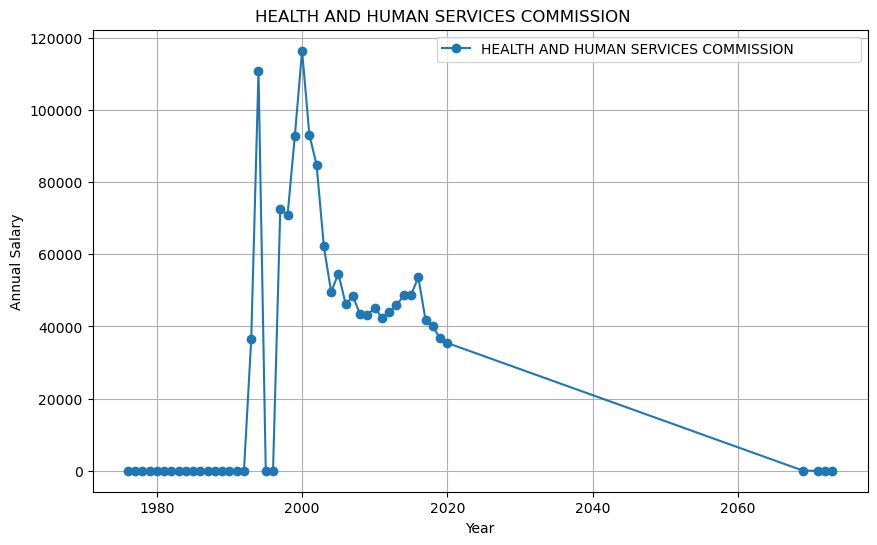

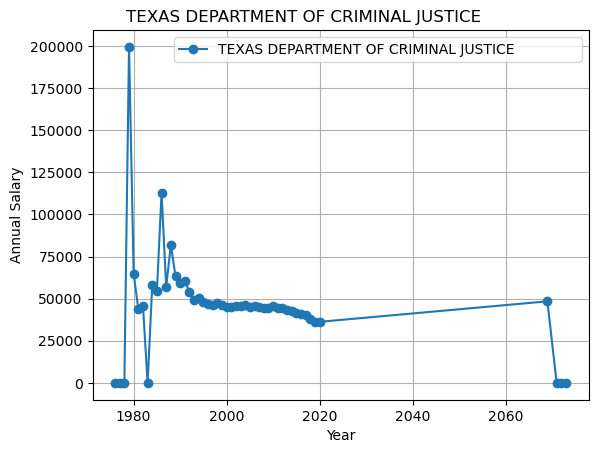

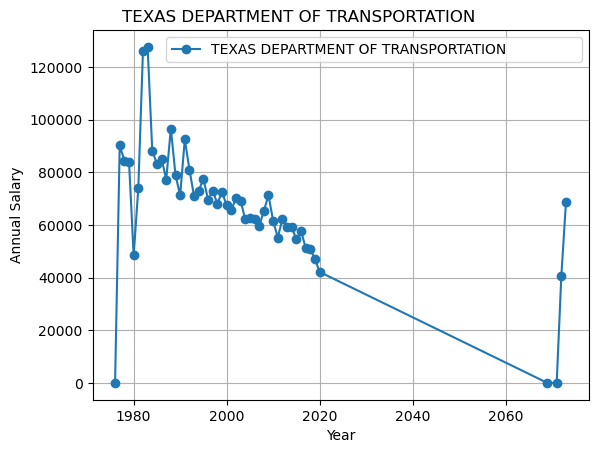

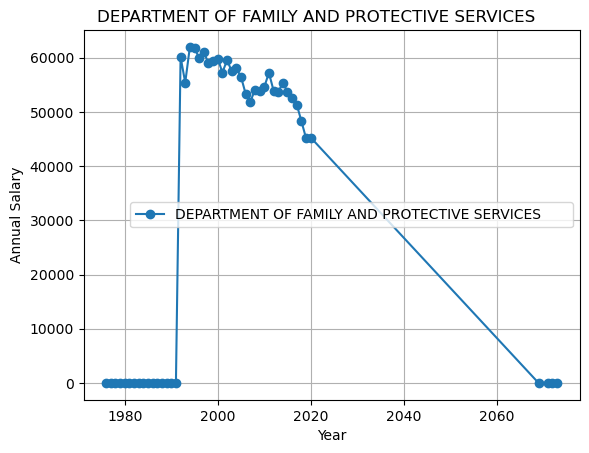

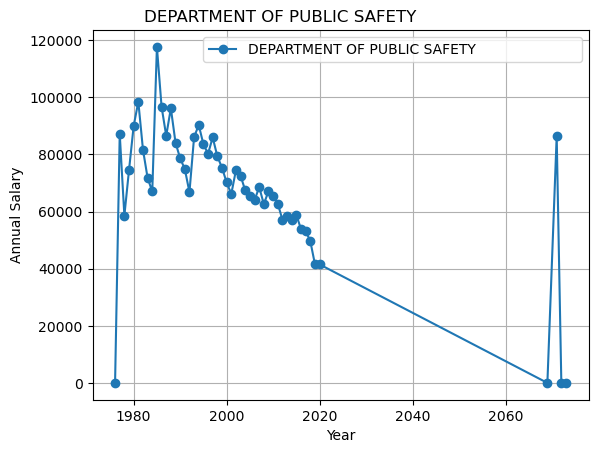

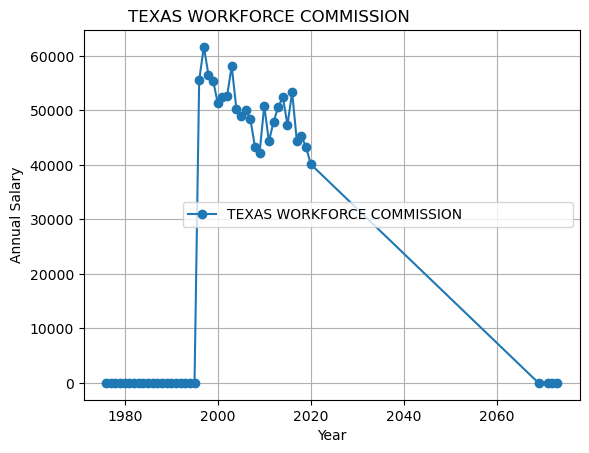

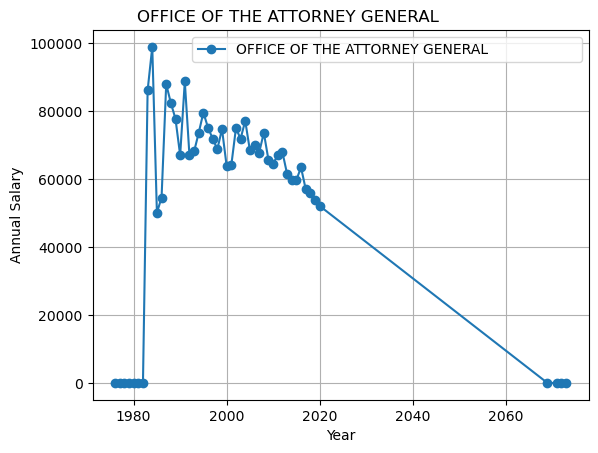

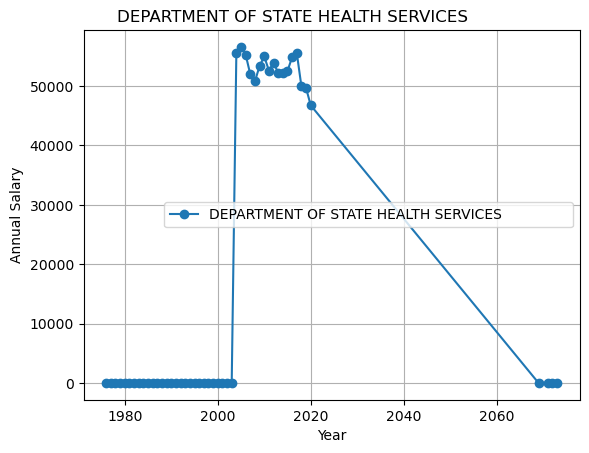

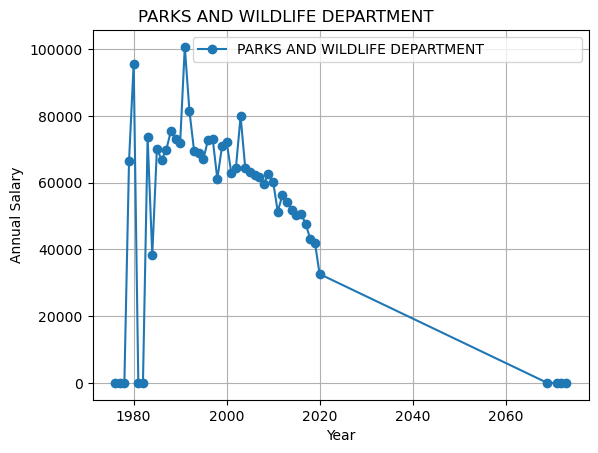

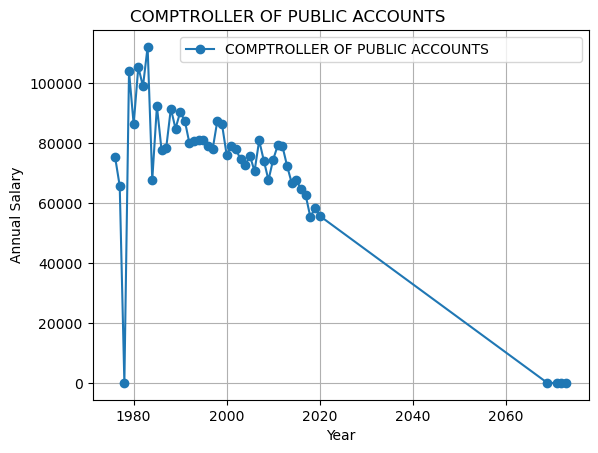

In [94]:
plt.figure(figsize=(10, 6))
for agency in agencies:
    agency_data = sorted_table_filled.iloc[sorted_table_filled.index==agency]
    plt.plot(agency_data.columns, agency_data.values[0], marker='o', label=agency_data.index[0])
    plt.xlabel('Year')
    plt.ylabel('Annual Salary')
    plt.title(agency_data.index[0])
    plt.legend()
    plt.grid(True)
    plt.show()



# Model Comparison Report


In [95]:
## Model Comparison Report

model_results = pd.DataFrame(columns=['Model', 'R-squared', 'MAE', 'RMSE'])

In [96]:
models = ['Linear Regression','Decision Tree','KNN','Random Forest','Gradient Boosting regressor','XGBoost']
r_squared = [0.8704,0.9998,0.7405,0.9998,0.9998,0.9998]
mae = [0.09338,6.9568,0.1059,6.5725,0.00245,0.00072]

rmse = [0.1505,0.0043,0.2131,0.0047,0.0053,0.0044]

In [97]:
# Populate the DataFrame
model_results['Model'] = models
model_results['R-squared'] = r_squared
model_results['MAE'] = mae
model_results['RMSE'] = rmse

# Display the results
model_results.head()

,Model,R-squared,MAE,RMSE
0,Linear Regression,0.8704,0.09338,0.1505
1,Decision Tree,0.9998,6.95680,0.0043
2,KNN,0.7405,0.10590,0.2131
3,Random Forest,0.9998,6.57250,0.0047
4,Gradient Boosting regressor,0.9998,0.00245,0.0053


In [98]:
model_results.to_csv('model_comparison_report.csv')

In [99]:
vs=pd.read_csv('model_comparison_report.csv')
vs.drop('Unnamed: 0',axis=1,inplace=True)
vs.head()


,Model,R-squared,MAE,RMSE
0,Linear Regression,0.8704,0.09338,0.1505
1,Decision Tree,0.9998,6.95680,0.0043
2,KNN,0.7405,0.10590,0.2131
3,Random Forest,0.9998,6.57250,0.0047
4,Gradient Boosting regressor,0.9998,0.00245,0.0053


<Figure size 2000x1000 with 0 Axes>

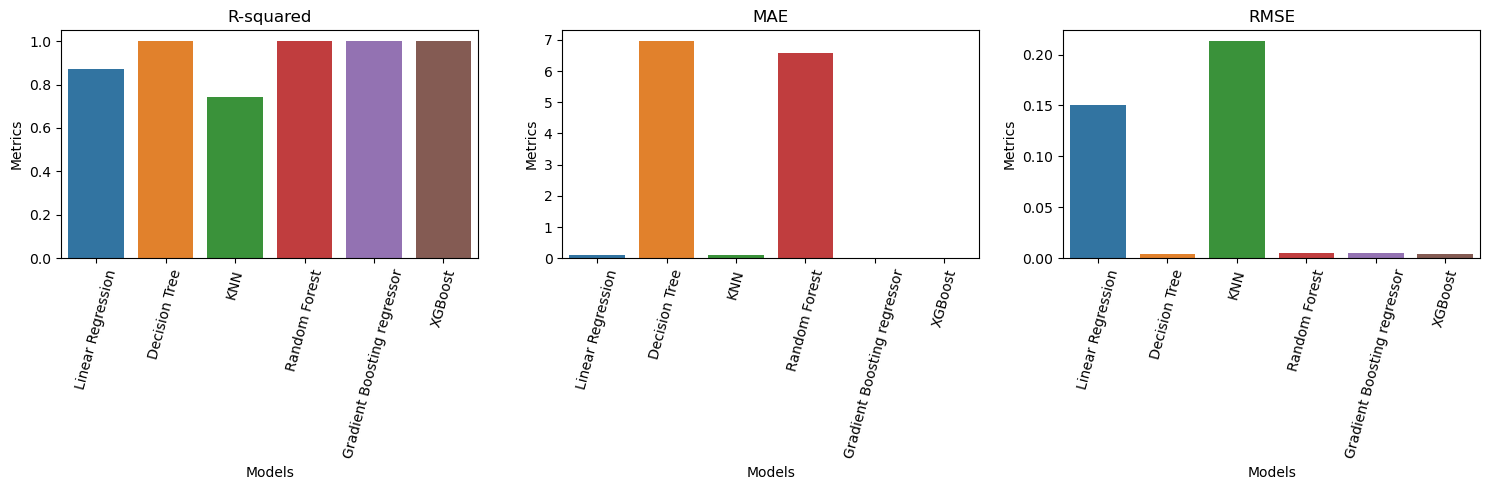

In [100]:
## Visualization


vs1=vs.drop('Model',axis=1)
#vs1.columns.to_list()

plt.figure(figsize=(20,10))
num =1
# Create a 1x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Iterate through metrics and corresponding subplot axis
for i, col in enumerate(vs1.columns.to_list()):
    sns.barplot(x='Model', y=col, data=vs, ax=axes[i])
    axes[i].set_xlabel('Models')
    axes[i].set_ylabel('Metrics')
    for tick in axes[i].get_xticklabels():
        tick.set_rotation(75)

    axes[i].set_title(col)


plt.tight_layout()
plt.show()



## Insights

    Decision Tree, Random Forest, Gradient Boosting, and XGBoost achieved near-perfect R2 scores (very close to 1), indicating excellent model performance in explaining the variance in the data.

    K-Nearest Neighbors (KNN) had a lower R2 score compared to the ensemble methods, suggesting it might not capture the complexity of the data as effectively.

    Linear Regression, while having a respectable R2 score, had a higher MAE and RMSE compared to the ensemble methods, indicating that its predictions had larger errors on average.

    Gradient Boosting and XGBoost outperformed all other models with extremely low MAE and RMSE values, indicating very accurate predictions.

    Decision Tree and Random Forest had high R2 scores but comparatively higher MAE values, which could suggest that they might overfit the data to some extent.

Overall, based on the provided metrics, Gradient Boosting and XGBoost appear to be the top-performing models, offering high accuracy and low errors. However, further evaluation, such as cross-validation, should be conducted to ensure the models generalize well to new data. Additionally, considerations about model complexity and interpretability may influence the final model choice for deployment.

# Data Analysis and Model Selection Report


Introduction: This report details the challenges encountered during the analysis of the Texas Salary Prediction dataset and the techniques employed to address those challenges. The goal was to develop an accurate salary prediction model for employees based on various attributes.


**Challenges Faced**:<br>


##### Missing Data:<br>
**Challenge**: <br>
The dataset contained missing values in several columns, which could potentially affect model performance.<br>
**Technique**:<br>
Missing values were handled using appropriate techniques based on the nature of the data. Categorical variables were imputed with mode values, while numerical variables were imputed using median values. This preserved data integrity without introducing bias.


##### Categorical Variables:<br>
**Challenge**:<br>
    The dataset included categorical attributes such as Ethnicity, Gender, and Status, which needed to be converted into numerical format for model training.<br>
**Technique**:<br>
    Label encoding was applied to convert categorical variables into numerical values. This technique was suitable when the categorical attributes had an inherent ordinal relationship.


##### Feature Scaling:<br>
**Challenge**:<br>
Numerical attributes had different scales such as Tenure Date,Monthly,Hourly Rate which could impact the performance of certain machine learning algorithms.<br>
**Technique**:<br>
Min-Max scaling was applied to scale numerical attributes to a common range between 0 and 1. This technique preserved the relationships between the variables while preventing any dominance of features with larger scales.


##### Employee Experience Calculation:<br>
**Challenge**:<br>
Converting the "Employ Date" attribute to years of experience from the current date was necessary to include a valuable feature for predicting salaries.<br>
**Technique**:<br>
The difference in years between the current date and the "Employ Date" was calculated to determine the tenure in years. This tenure value was added as a feature for the predictive models.



##### Model Selection:<br>
**Challenge**:<br>
Selecting the appropriate machine learning algorithms to predict salary accurately while avoiding overfitting and underfitting.<br>
**Technique**: <br>Six algorithms were evaluated—Linear Regression, K-Nearest Neighbors (KNN), Decision Tree, Random Forest, XGBoost, and Gradient Boosting. Each algorithm was chosen based on its inherent properties and suitability for the dataset. Random Forest, XGBoost, and Gradient Boosting were preferred for their ability to capture complex relationships and reduce overfitting due to their ensemble and boosting techniques.


##### Techniques Employed with Reasons:<br>
**Handling Missing Data:**<br>
Missing values were imputed using mode for categorical variables and median for numerical variables. This approach maintained data quality while minimizing distortion introduced by imputation. Using the mode and median also helped in handling skewed distributions.<br>
**Label Encoding:**<br>
Label encoding was chosen to convert categorical variables to numerical format. This technique was used for variables where an inherent order existed (e.g., Status,Ethnicity).<br>
**Min-Max Scaling:**<br>
Min-Max scaling was employed to normalize numerical attributes to a common scale. This ensured that all features contributed equally to the model and prevented larger-scaled features from dominating the learning process.<br>
**Employee Experience Calculation:**<br>
Converting the "Employ Date" to years of experience was accomplished by calculating the difference between the current date and the "Employ Date." This added an important temporal feature that could impact salary predictions.<br>
**Model Selection:**<br>
Linear Regression was chosen for its simplicity and interpretability, making it a good baseline model.

Random Forest, XGBoost, and Gradient Boosting were selected due to their ability to handle complex relationships and reduce overfitting. XGBoost, in particular, was chosen for its ensemble approach that enhances model accuracy.

K-Nearest Neighbors (KNN) and Decision Tree were also included to explore alternative modeling approaches and assess their performance on the dataset.<br>


##### Conclusion:<br>
The challenges faced during data analysis were addressed using appropriate techniques that maintained data integrity and improved model performance. Through careful handling of missing data, encoding categorical attributes, scaling features, calculating employee experience, and selecting suitable algorithms,a robust salary prediction model was developed. This model selection process led to the recommendation of employing the XGBoost algorithm due to its strong overall performance in terms of accuracy and robustness.
